In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import preprocessing

%matplotlib inline

In [21]:
sns.set_style('whitegrid')

In [22]:
df_red = pd.read_csv('winequality-red.csv')
df_white = pd.read_csv('winequality-white.csv')

# add color attributes for each type of wine
df_red['type'] = 'Red'
df_white['type'] = 'White'

frames = [df_red, df_white]
df = pd.concat(frames)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
type                    6497 non-null object
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [24]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6497.000000  6497.000000  6497.000000  6497.000000  
mean      3.218501     0.531268    10.491801     5.818378  
std       0.160787     0.148806     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

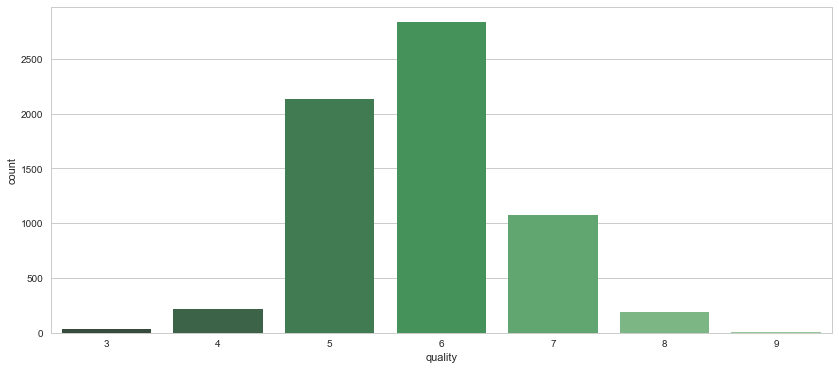

In [25]:
fig = plt.figure(figsize=(14, 6))
sns.countplot(x='quality', data=df, palette="Greens_d")
df['quality'].value_counts(ascending=False)

There are not a lot of wines that considered excellent. There are not a lot of wines that are considered extremely poor. The scores follow a normal distribution. Quality is our outcome variable for this exploration.

There are no wines that were awarded 1s, 2s, or 10s.

White    4898
Red      1599
Name: type, dtype: int64

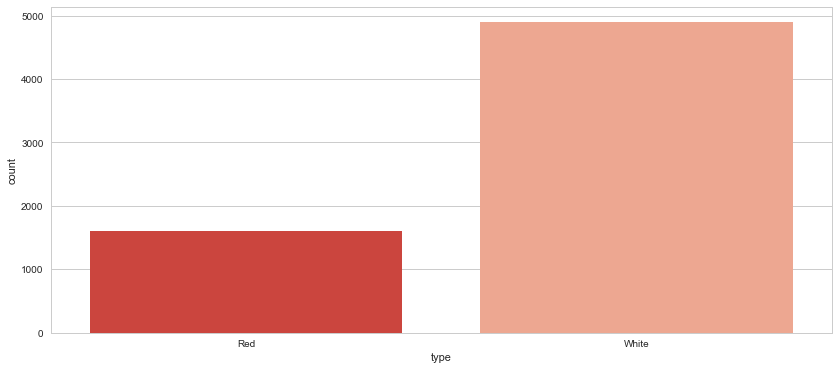

In [26]:
fig = plt.figure(figsize=(14, 6))
sns.countplot(x='type', data=df, palette='Reds_r')
df['type'].value_counts()

The number of white wines in the data set outnumber the red wines by a factor of about 3 to 1.

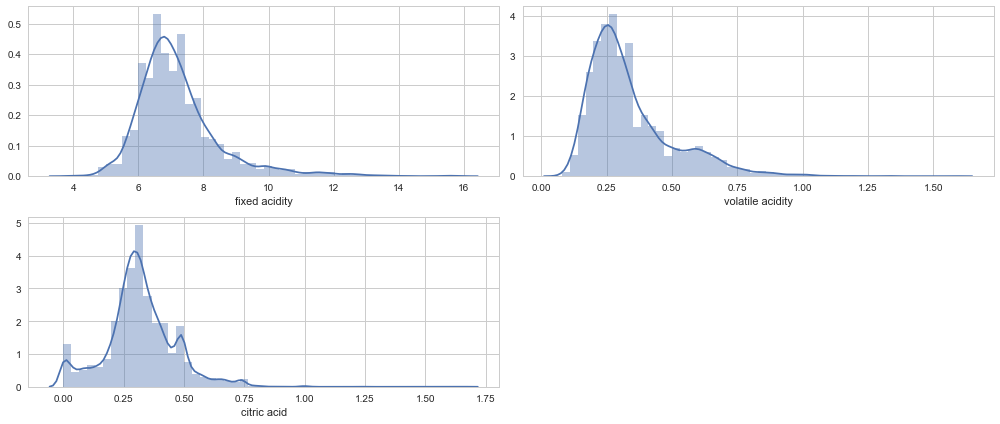

In [27]:
fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(221)
sns.distplot(df['fixed acidity'])

ax2 = fig.add_subplot(222)
sns.distplot(df['volatile acidity'])

ax3 = fig.add_subplot(223)
sns.distplot(df['citric acid'])

plt.tight_layout()

The histograms for fixed and volatile acidities are heavily left skewed. 

There also seem to be multiple peaks, indicating the differences between both red and white wines.

The histogram for citric acid has a high proportion of wines with low citric acid. The multitude of peaks is most likely a result of the two types of wine. 

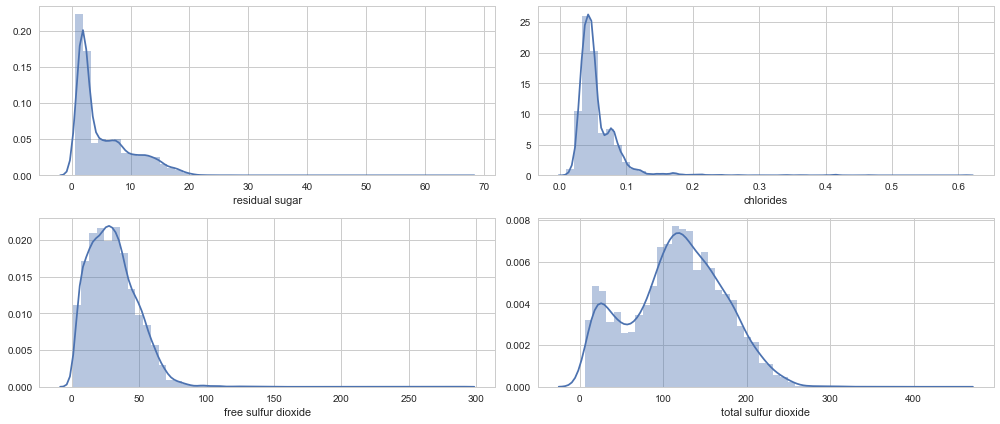

In [28]:
fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(221)
sns.distplot(df['residual sugar'])

ax2 = fig.add_subplot(222)
sns.distplot(df['chlorides'])

ax3 = fig.add_subplot(223)
sns.distplot(df['free sulfur dioxide'])

ax4 = fig.add_subplot(224)
sns.distplot(df['total sulfur dioxide'])

plt.tight_layout()

Each of these histograms are heavily left skewed with outliers on the large side.

Once again, the multiple peaks are most likely a result of the different types of wine.

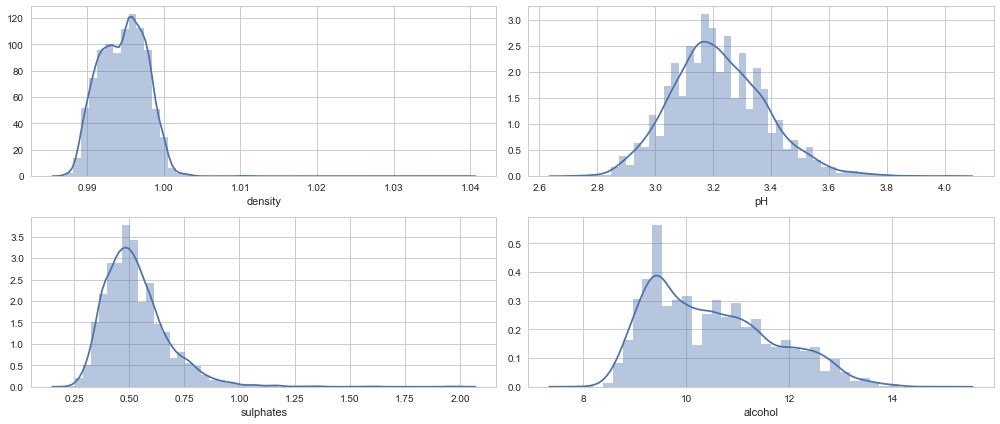

In [29]:
fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(221)
sns.distplot(df['density'])

ax2 = fig.add_subplot(222)
sns.distplot(df['pH'])

ax3 = fig.add_subplot(223)
sns.distplot(df['sulphates'])

ax4 = fig.add_subplot(224)
sns.distplot(df['alcohol'])

plt.tight_layout()

The histogram for alcohol is irregular but it does not have extreme outlier cases like the other graphs.

The histogram values for pH levels are almost normal.

Each drink has some amount of alchol inside of it.

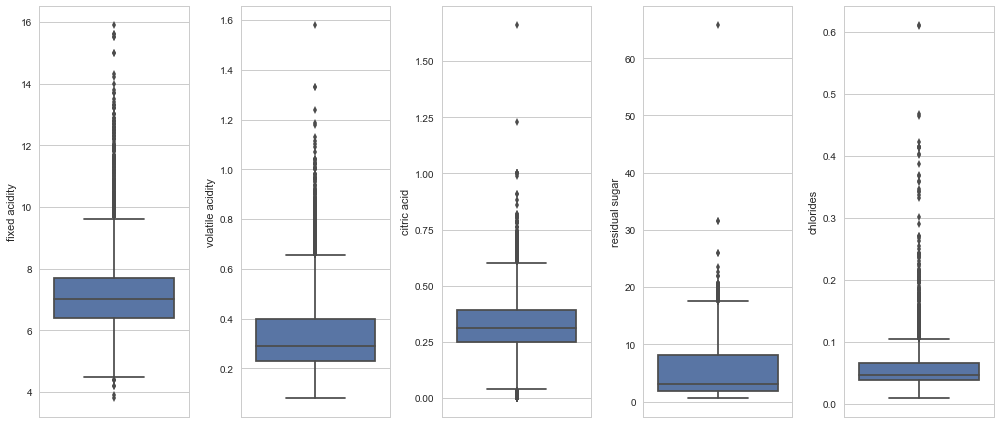

In [30]:
fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(151)
sns.boxplot(y=df['fixed acidity'])

ax2 = fig.add_subplot(152)
sns.boxplot(y=df['volatile acidity'])

ax3 = fig.add_subplot(153)
sns.boxplot(y=df['citric acid'])

ax4 = fig.add_subplot(154)
sns.boxplot(y=df['residual sugar'])

ax5 = fig.add_subplot(155)
sns.boxplot(y=df['chlorides'])

plt.tight_layout()

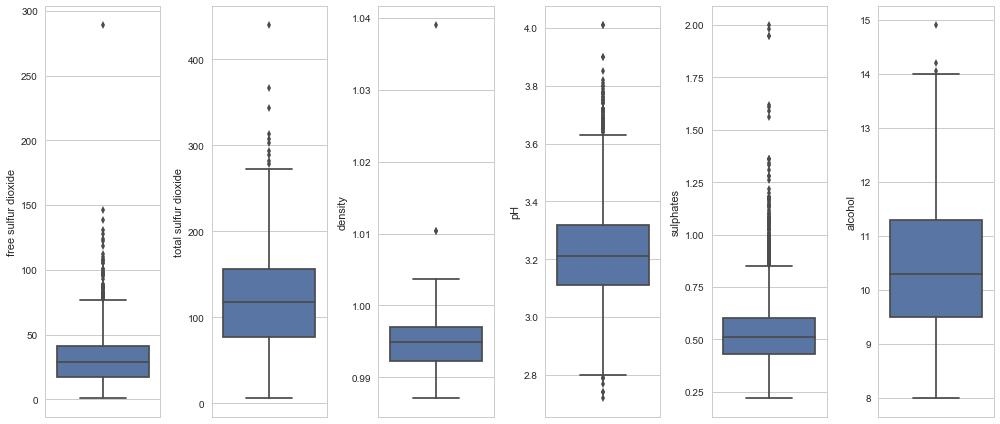

In [31]:
fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(161)
sns.boxplot(y=df['free sulfur dioxide'])

ax2 = fig.add_subplot(162)
sns.boxplot(y=df['total sulfur dioxide'])

ax3 = fig.add_subplot(163)
sns.boxplot(y=df['density'])

ax4 = fig.add_subplot(164)
sns.boxplot(y=df['pH'])

ax5 = fig.add_subplot(165)
sns.boxplot(y=df['sulphates'])

ax6 = fig.add_subplot(166)
sns.boxplot(y=df['alcohol'])

plt.tight_layout()

Each variable has outlier values. Removing them can some variables the semblance of symmetry, even though that may not be the case.

### Handling Outliers

In [97]:
# computes Z-score for each value in the column, relative to column mean and std dev
# takes the absolute value of Z-score, direction does not matter
# all ensures that each row/column will satisfy the constraint

df = df[(np.abs(stats.zscore(filt_df)) < 3).all(axis=1)]

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5989 entries, 0 to 4897
Data columns (total 13 columns):
fixed acidity           5989 non-null float64
volatile acidity        5989 non-null float64
citric acid             5989 non-null float64
residual sugar          5989 non-null float64
chlorides               5989 non-null float64
free sulfur dioxide     5989 non-null float64
total sulfur dioxide    5989 non-null float64
density                 5989 non-null float64
pH                      5989 non-null float64
sulphates               5989 non-null float64
alcohol                 5989 non-null float64
quality                 5989 non-null int64
type                    5989 non-null object
dtypes: float64(11), int64(1), object(1)
memory usage: 655.0+ KB


In [102]:
f, ax = plt.subplots(figsize=(12, 9))

corrmat = df.corr()

sns.heatmap(corrmat, annot=True)

Notable Correlations:
  
Positive:

- density and residual sugar
- total sulfur dioxide and residual sugar
- total sulfur dioxide and free sulfur dioxide
- free sulfur dioxide and residual sugar
- chlorides and volatile acidity
- alcohol and quality
- chlorides and density
- density and fixed acidity


Negative:
- alcohol and density
- volatile acidity and total sulfur dioxide
- citric acid and volatile acidity

In [104]:
sns.pairplot(df)
# how should I go about limiting the data so that I can actually see the trends?

In [171]:
# removes red warning for chained assignments that would normally result
#   from the operations below
pd.options.mode.chained_assignment = None

# creation of new categorical feature based on quality
df['overall_rating'] = 'normal'
df['overall_rating'][df['quality'] <= 4] = 'poor'
df['overall_rating'][df['quality'] >= 7] ='excellent'

df['overall_rating'].value_counts()

normal       4594
excellent    1211
poor          184
Name: overall_rating, dtype: int64

In [201]:
sns.countplot(df['type'], hue=df['overall_rating'])

result = df.groupby(['type', 'overall_rating']).agg({'quality': 'count'})
result2 = result.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
print(result2)

                        quality
type  overall_rating           
Red   excellent       13.234143
      normal          84.416601
      poor             2.349256
White excellent       22.113752
      normal          74.617997
      poor             3.268251


A greater percentage of white wines are considered excellent, compared to red wines.

### Feature Creation

In [206]:
# categorical variable example

features = pd.get_dummies(df['type'])

features['is_excellent'] = np.where((df['overall_rating'].isin(['excellent'])), 1, 0)
features['is_poor'] = np.where((df['overall_rating'].isin(['poor'])), 1, 0)
features['is_normal'] = np.where((df['overall_rating'].isin(['normal'])), 1, 0)

print(pd.crosstab(features['is_excellent'], df['type']))

# Decomposition of a categorical feature

type           Red  White
is_excellent             
0             1108   3670
1              169   1042


In [122]:
features['Alcohol_content_11plus'] = np.where(df['alcohol']>=11, 0, 1)

print(df['alcohol'].groupby(features['Alcohol_content_11plus']).describe())

# Decomposition of a categorical feature

                         count       mean       std   min   25%   50%   75%  \
Alcohol_content_11plus                                                        
0                       2053.0  11.902525  0.696143  11.0  11.3  11.8  12.4   
1                       3936.0   9.780042  0.613024   8.4   9.3   9.7  10.3   

                          max  
Alcohol_content_11plus         
0                       14.05  
1                       10.98  


                           total sulfur dioxide  free sulfur dioxide  \
total sulfur dioxide                   1.000000             0.718169   
free sulfur dioxide                    0.718169             1.000000   
total_free_sulfur_dioxide              0.985493             0.825850   

                           total_free_sulfur_dioxide  
total sulfur dioxide                        0.985493  
free sulfur dioxide                         0.825850  
total_free_sulfur_dioxide                   1.000000  


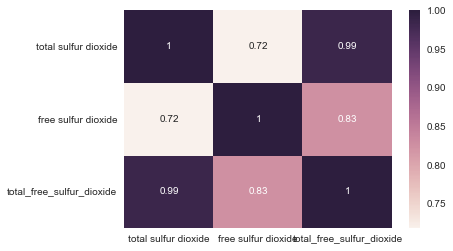

In [126]:
means = df[['total sulfur dioxide', 'free sulfur dioxide']].mean(axis=0)
stds = df[['total sulfur dioxide', 'free sulfur dioxide']].std(axis=0)
features['total_free_sulfur_dioxode'] = ((df[['total sulfur dioxide', 'free sulfur dioxide']] - means / stds).mean(axis=1))

plotdf = df.loc[:, ['total sulfur dioxide', 'free sulfur dioxide']]
plotdf['total_free_sulfur_dioxide'] = features['total_free_sulfur_dioxode']
corrmat2 = plotdf.corr()
print(corrmat2)

sns.heatmap(corrmat2, annot=True)

# average of correlated variables

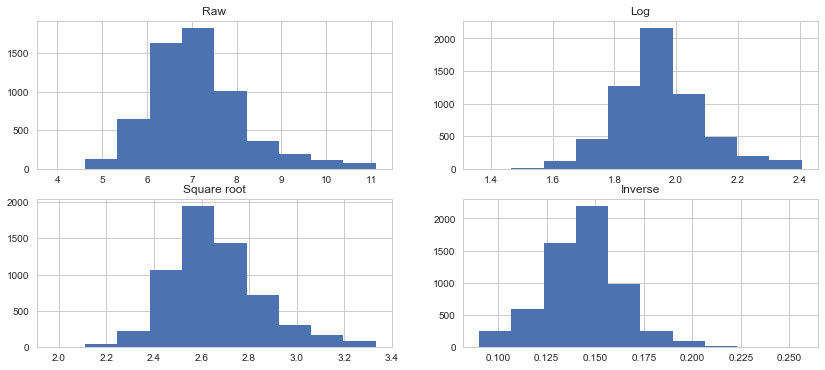

In [132]:
fig = plt.figure(figsize=(14, 6))

fig.add_subplot(221)
plt.hist(df['fixed acidity'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df['fixed acidity'].dropna()))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df['fixed acidity'].dropna()))
plt.title('Square root')

ax3=fig.add_subplot(224)
plt.hist(1/df['fixed acidity'].dropna())
plt.title('Inverse')
plt.show()


features['log_fixed_acidity'] = np.log(df['fixed acidity'])

# creating a normal distribution of acid levels

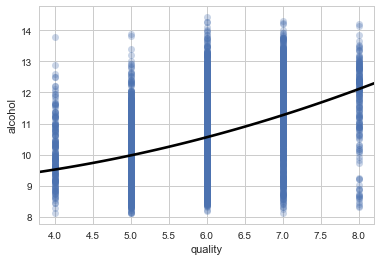

In [136]:
sns.regplot(
    df['quality'],
    y=df['alcohol'],
    y_jitter=.49,
    order=2,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.show()

features['alcohol_squared'] = df['alcohol'] * df['alcohol']

# relationship between quality and alcohol levels?

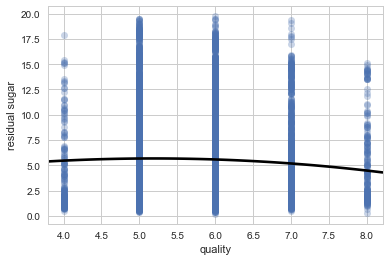

In [138]:
sns.regplot(
    df['quality'],
    y=df['residual sugar'],
    y_jitter=.49,
    order=2,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.show()

features['residual_sugar_squared'] = df['residual sugar'] * df['residual sugar']

# relationship between sugar and quality?

In [142]:
df_num = df.select_dtypes(include=[np.number])

names = df_num.columns

df_scaled = pd.DataFrame(preprocessing.scale(df_num), columns=names)

#plt.scatter(df_num['residual sugar'], df_scaled['residual sugar'])

print(df_scaled.describe())

       fixed acidity  volatile acidity   citric acid  residual sugar  \
count   5.989000e+03      5.989000e+03  5.989000e+03    5.989000e+03   
mean    7.782498e-16     -2.795853e-14 -1.769924e-15   -7.290879e-16   
std     1.000083e+00      1.000083e+00  1.000083e+00    1.000083e+00   
min    -3.048552e+00     -1.687036e+00 -2.344281e+00   -1.054772e+00   
25%    -6.618583e-01     -7.286682e-01 -4.701954e-01   -7.966767e-01   
50%    -1.845195e-01     -2.494846e-01 -2.041498e-02   -4.955658e-01   
75%     4.837549e-01      4.350635e-01  5.043289e-01    5.798306e-01   
max     3.825126e+00      3.447075e+00  3.203012e+00    3.010226e+00   

          chlorides  free sulfur dioxide  total sulfur dioxide       density  \
count  5.989000e+03         5.989000e+03          5.989000e+03  5.989000e+03   
mean   8.282646e-17         1.966480e-16          5.411378e-15 -3.328096e-14   
std    1.000083e+00         1.000083e+00          1.000083e+00  1.000083e+00   
min   -2.027488e+00        -1.8

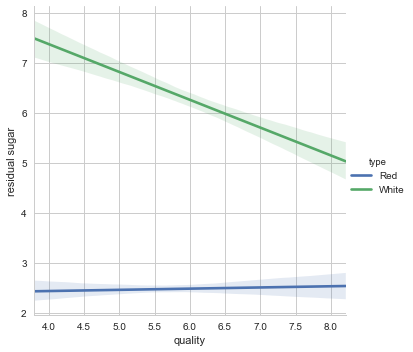

In [204]:
features['is_white'] = np.where(df['type'] == 'white', 1, 0) 
features['is_red'] = np.where(df['type'] == 'red', 1, 0) 

sns.lmplot(
    x='quality',
    y='residual sugar',
    hue='type',
    data=df,
    scatter=False
)

# decomposition of a categorical feature

### Feature Selection?